# Lab 3 pt 2: NDAWN

In [2]:
import os 
import requests
from io import BytesIO, StringIO 
import datetime 
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1) Gather data

In [3]:

# Get a csv from their api

# Examples
# These get daily max/min/avg temp for all stations for the past month

# url = 'https://ndawn.ndsu.nodak.edu/table.csv?station=78&station=111&station=98&station=174&station=142&station=138&station=161&station=9&station=10&station=118&station=56&station=11&station=12&station=58&station=13&station=84&station=55&station=7&station=87&station=14&station=15&station=96&station=16&station=137&station=124&station=143&station=17&station=85&station=140&station=134&station=18&station=136&station=65&station=104&station=99&station=19&station=129&station=20&station=101&station=81&station=21&station=97&station=22&station=75&station=2&station=172&station=139&station=23&station=62&station=86&station=24&station=89&station=126&station=93&station=90&station=25&station=83&station=107&station=156&station=77&station=26&station=70&station=127&station=27&station=132&station=28&station=29&station=30&station=31&station=102&station=32&station=119&station=4&station=80&station=33&station=59&station=105&station=82&station=34&station=72&station=135&station=35&station=76&station=120&station=141&station=109&station=36&station=79&station=71&station=37&station=38&station=39&station=130&station=73&station=40&station=41&station=54&station=69&station=113&station=128&station=42&station=43&station=103&station=116&station=88&station=114&station=3&station=163&station=64&station=115&station=67&station=44&station=133&station=106&station=100&station=121&station=45&station=46&station=61&station=66&station=74&station=60&station=125&station=8&station=47&station=122&station=108&station=5&station=152&station=48&station=68&station=49&station=50&station=91&station=117&station=63&station=150&station=51&station=6&station=52&station=92&station=112&station=131&station=123&station=95&station=53&station=57&station=149&station=148&station=110&variable=mdmxt&variable=mdmnt&variable=mdavt&year=2022&ttype=monthly&quick_pick=1_y&begin_date=2021-09&count=12'
# url = 'https://ndawn.ndsu.nodak.edu/table.csv?station=78&station=111&station=98&station=174&station=142&station=138&station=161&station=9&station=10&station=118&station=56&station=11&station=12&station=58&station=13&station=84&station=55&station=7&station=87&station=14&station=15&station=96&station=16&station=137&station=124&station=143&station=17&station=85&station=140&station=134&station=18&station=136&station=65&station=104&station=99&station=19&station=129&station=20&station=101&station=81&station=21&station=97&station=22&station=75&station=2&station=172&station=139&station=23&station=62&station=86&station=24&station=89&station=126&station=93&station=90&station=25&station=83&station=107&station=156&station=77&station=26&station=70&station=127&station=27&station=132&station=28&station=29&station=30&station=31&station=102&station=32&station=119&station=4&station=80&station=33&station=59&station=105&station=82&station=34&station=72&station=135&station=35&station=76&station=120&station=141&station=109&station=36&station=79&station=71&station=37&station=38&station=39&station=130&station=73&station=40&station=41&station=54&station=69&station=113&station=128&station=42&station=43&station=103&station=116&station=88&station=114&station=3&station=163&station=64&station=115&station=67&station=44&station=133&station=106&station=100&station=121&station=45&station=46&station=61&station=66&station=74&station=60&station=125&station=8&station=47&station=122&station=108&station=5&station=152&station=48&station=68&station=49&station=50&station=91&station=117&station=63&station=150&station=51&station=6&station=52&station=92&station=112&station=131&station=123&station=95&station=53&station=57&station=149&station=148&station=110&variable=mdmxt&variable=mdmnt&variable=mdavt&year=2022&ttype=monthly&quick_pick=1_m&begin_date=2021-11&count=1'
# url = 'https://ndawn.ndsu.nodak.edu/table.csv?station=78&station=111&station=98&station=174&station=142&station=138&station=161&station=9&station=10&station=118&station=56&station=11&station=12&station=58&station=13&station=84&station=55&station=7&station=87&station=14&station=15&station=96&station=16&station=137&station=124&station=143&station=17&station=85&station=140&station=134&station=18&station=136&station=65&station=104&station=99&station=19&station=129&station=20&station=101&station=81&station=21&station=97&station=22&station=75&station=2&station=172&station=139&station=23&station=62&station=86&station=24&station=89&station=126&station=93&station=90&station=25&station=83&station=107&station=156&station=77&station=26&station=70&station=127&station=27&station=132&station=28&station=29&station=30&station=31&station=102&station=32&station=119&station=4&station=80&station=33&station=59&station=105&station=82&station=34&station=72&station=135&station=35&station=76&station=120&station=141&station=109&station=36&station=79&station=71&station=37&station=38&station=39&station=130&station=73&station=40&station=41&station=54&station=69&station=113&station=128&station=42&station=43&station=103&station=116&station=88&station=114&station=3&station=163&station=64&station=115&station=67&station=44&station=133&station=106&station=100&station=121&station=45&station=46&station=61&station=66&station=74&station=60&station=125&station=8&station=47&station=122&station=108&station=5&station=152&station=48&station=68&station=49&station=50&station=91&station=117&station=63&station=150&station=51&station=6&station=52&station=92&station=112&station=131&station=123&station=95&station=53&station=57&station=149&station=148&station=110&variable=ddmxt&variable=ddmnt&variable=ddavt&ttype=daily&quick_pick=30_d'

# Building those urls
base_url = 'https://ndawn.ndsu.nodak.edu/table.csv?'

# Get station string
station_numbers = [ 78, 111,  98, 174, 142, 138, 161, 9,  10, 118,  56,  11,  12,
                    58,  13,  84,  55,   7,  87,  14,  15,  96,  16, 137, 124, 143,
                    17,  85, 140, 134,  18, 136,  65, 104,  99,  19, 129,  20, 101,
                    81,  21,  97,  22,  75,   2, 172, 139,  23,  62,  86,  24,  89,
                   126,  93,  90,  25,  83, 107, 156,  77,  26,  70, 127,  27, 132,
                    28,  29,  30,  31, 102,  32, 119,   4,  80,  33,  59, 105,  82,
                    34,  72, 135,  35,  76, 120, 141, 109,  36,  79,  71,  37,  38,
                    39, 130,  73,  40,  41,  54,  69, 113, 128,  42,  43, 103, 116,
                    88, 114,   3, 163,  64, 115,  67,  44, 133, 106, 100, 121,  45,
                    46,  61,  66,  74,  60, 125,   8,  47, 122, 108,   5, 152,  48,
                    68,  49,  50,  91, 117,  63, 150,  51,   6,  52,  92, 112, 131,
                   123,  95,  53,  57, 149, 148, 110]

station_strings = []

for station_number in station_numbers:
    station_strings += ['station=' + str(station_number)]

station_string = '&'.join(station_strings)

fields = ['variable=ddmxt',
     'variable=ddmnt',
     'variable=ddavt',
     'ttype=daily',
     'quick_pick=30_d']

fields_string = '&'.join(fields)

request_url = base_url + '&'.join([station_string,
                                   fields_string])

response = requests.request('GET', request_url)

In [4]:

# Find where CSV Starts
start = response.text.find('Station Name')

# Decoding string
decoding = StringIO(response.text[start:])

# Read into Pandas
temps = pd.read_csv(decoding).iloc[1:,:] # Skipping first entry, it just gives the units of each column

# Add spatial component with GeoPandas
temps_gdf = gpd.GeoDataFrame(temps,
                             geometry = gpd.points_from_xy(x = temps.Longitude, y = temps.Latitude),
                             crs = 'EPSG:4326')

In [8]:
# Get relevant columns for csv
cols = temps_gdf.columns[:-1] # Want all columns besides geometry

# Save as csv
temps_gdf[cols].to_csv('temps_raw.csv', index = False)

## 2) Process Data

In [9]:
# Load data
temps = pd.read_csv('temps_raw.csv')

temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station Name   4230 non-null   object 
 1   Latitude       4230 non-null   float64
 2   Longitude      4230 non-null   float64
 3   Elevation      4230 non-null   int64  
 4   Year           4230 non-null   float64
 5   Month          4230 non-null   float64
 6   Day            4230 non-null   float64
 7   Max Temp       4230 non-null   float64
 8   Max Temp Flag  4 non-null      object 
 9   Min Temp       4230 non-null   float64
 10  Min Temp Flag  11 non-null     object 
 11  Avg Temp       4230 non-null   float64
 12  Avg Temp Flag  11 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 429.7+ KB


In [10]:
# Check the flag columns for unique values
print(temps['Max Temp Flag'].unique())
print(temps['Min Temp Flag'].unique())
print(temps['Avg Temp Flag'].unique())

[nan 'E']
[nan 'E']
[nan 'E']


In [11]:
error_data = temps[(temps['Avg Temp Flag'] == 'E') |
                       (temps['Max Temp Flag'] == 'E') | 
                      (temps['Min Temp Flag'] == 'E')]

error_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 285 to 3255
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station Name   11 non-null     object 
 1   Latitude       11 non-null     float64
 2   Longitude      11 non-null     float64
 3   Elevation      11 non-null     int64  
 4   Year           11 non-null     float64
 5   Month          11 non-null     float64
 6   Day            11 non-null     float64
 7   Max Temp       11 non-null     float64
 8   Max Temp Flag  4 non-null      object 
 9   Min Temp       11 non-null     float64
 10  Min Temp Flag  11 non-null     object 
 11  Avg Temp       11 non-null     float64
 12  Avg Temp Flag  11 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.2+ KB


In [12]:
error_data[['Year', 'Month', 'Day', 'Station Name']]

,Year,Month,Day,Station Name
285,2023.0,11.0,21.0,Becker
664,2023.0,11.0,10.0,Clarissa
955,2023.0,12.0,1.0,Dagmar
956,2023.0,12.0,2.0,Dagmar
957,2023.0,12.0,3.0,Dagmar
958,2023.0,12.0,4.0,Dagmar
959,2023.0,12.0,5.0,Dagmar
2355,2023.0,11.0,21.0,Little Falls
3074,2023.0,11.0,20.0,Pine Point
3087,2023.0,12.0,3.0,Pine Point


In [14]:
# Remove error data
clean_data = temps[~(temps['Avg Temp Flag'] == 'E') &
                       ~(temps['Max Temp Flag'] == 'E') & 
                       ~(temps['Min Temp Flag'] == 'E')]

In [15]:
# Grouping by station

# Columns for stats
stat_cols = ['Max Temp', 'Min Temp', 'Avg Temp']
# Columns for station information
station_cols = ['Station Name', 'Latitude', 'Longitude', 'Elevation']
stats_data = clean_data[station_cols + stat_cols]

# Group by Station Name
mean_data = stats_data.groupby(station_cols).mean().reset_index()

# Preview of df
mean_data.head()

,Station Name,Latitude,Longitude,Elevation,Max Temp,Min Temp,Avg Temp
0,Ada,47.32119,-96.51406,910,38.767200,19.972867,29.370267
1,Adams,48.49988,-98.07588,1580,36.160600,18.632700,27.396900
2,Alamo,48.54652,-103.47186,2157,40.677500,17.218900,28.948467
3,Alvarado,48.24594,-97.02153,809,38.007633,21.248033,29.628067
4,Amidon,46.48844,-103.31629,2882,45.298433,19.610333,32.454700


In [16]:
# Transform into UTM coords (NAD83, utm zone 14N)

# Spatialize df
temps_gdf = gpd.GeoDataFrame(mean_data,
                             geometry = gpd.points_from_xy(x = mean_data.Longitude,
                                                           y = mean_data.Latitude),
                             crs = 'EPSG:4326')

# Transform

temps_utm = temps_gdf.to_crs('EPSG:26914')

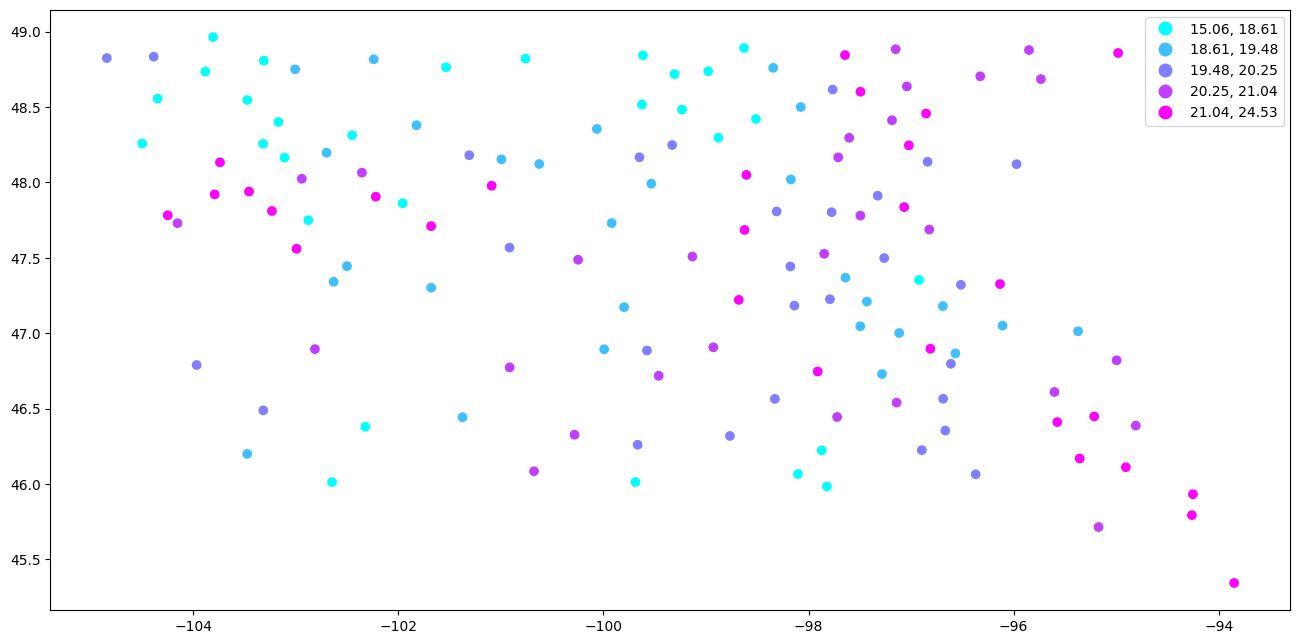

In [17]:
# Verification 

f, ax = plt.subplots(1,1,figsize = (16,8))

temps_gdf.plot('Min Temp', cmap = 'cool',k=5,
                       scheme = 'quantiles', 
               legend = True,
               ax = ax)

plt.show()


In [18]:
# Save as geojson

# Add UTM column
temps_utm['X'] = temps_utm.geometry.x
temps_utm['Y'] = temps_utm.geometry.y

# Get relevant columns for csv

cols = ['Station Name', 'Elevation', 'Max Temp', 'Min Temp',
       'Avg Temp', 'X', 'Y', 'geometry']

temps_utm[cols].to_file('temps.geojson')

In [19]:
# Save as CSV

# Get relevant columns for csv
cols = ['Station Name', 'Elevation', 'Max Temp', 'Min Temp',
       'Avg Temp', 'X', 'Y']

# Save as csv
temps_utm[cols].to_csv('temps.csv')